<a href="https://colab.research.google.com/github/FatihUlumuddin/Image_Processing/blob/main/Image_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving image.jpg to image.jpg


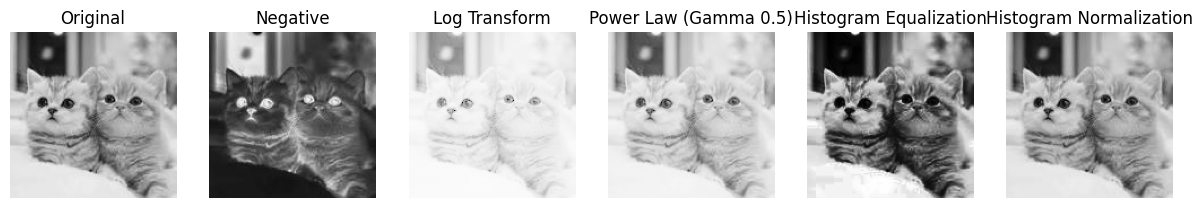

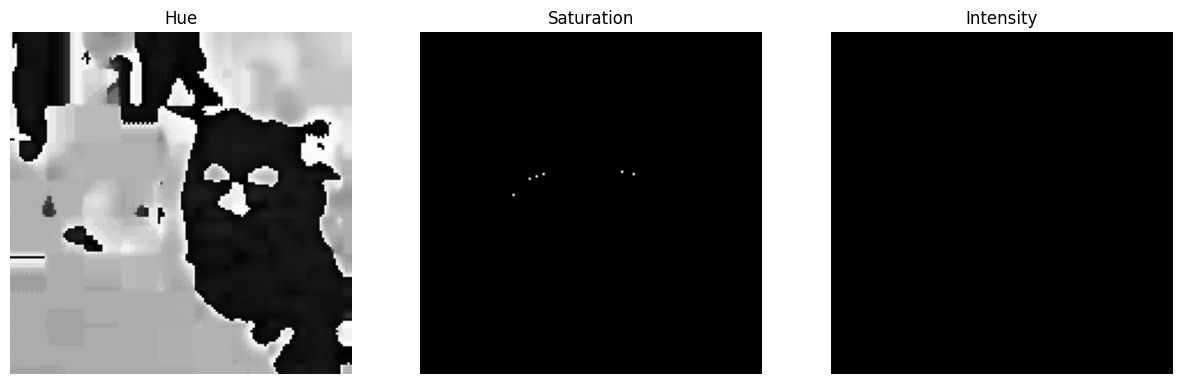

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Upload image
uploaded = files.upload()

# Load image safely
def load_image(filename, mode=cv2.IMREAD_COLOR):
    image = cv2.imread(filename, mode)
    if image is None:
        raise FileNotFoundError(f"Error: File '{filename}' not found or could not be loaded.")
    return image

def negative_image(image):
    return 255 - image

def log_transform(image):
    c = 255 / np.log(1 + np.max(image))
    return (c * np.log(1 + image)).astype(np.uint8)

def power_law_transform(image, gamma=1.0):
    c = 255 / (255 ** gamma)
    return (c * (image ** gamma)).astype(np.uint8)

def histogram_equalization(image):
    return cv2.equalizeHist(image)

def histogram_normalization(image):
    norm_image = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX)
    return norm_image.astype(np.uint8)

def rgb_to_hsi(image):
    img = image.astype(np.float32) / 255.0
    B, G, R = cv2.split(img)
    intensity = (R + G + B) / 3
    min_RGB = np.minimum(np.minimum(R, G), B)
    saturation = 1 - (min_RGB / (intensity + 1e-7))

    num = 0.5 * ((R - G) + (R - B))
    den = np.sqrt((R - G) ** 2 + (R - B) * (G - B)) + 1e-7
    hue = np.arccos(num / den)
    hue[B > G] = 2 * np.pi - hue[B > G]
    hue = hue / (2 * np.pi) * 255

    return cv2.merge((hue.astype(np.uint8), saturation.astype(np.uint8) * 255, intensity.astype(np.uint8) * 255))

def threshold_hsi(image, lower_hue, upper_hue):
    hsi_image = rgb_to_hsi(image)
    H, S, I = cv2.split(hsi_image)
    mask = cv2.inRange(H, lower_hue, upper_hue)
    return mask

def show_images(images, titles, cmap='gray'):
    plt.figure(figsize=(15, 5))
    for i in range(len(images)):
        plt.subplot(1, len(images), i+1)
        plt.imshow(images[i], cmap=cmap if len(images[i].shape) == 2 else None)
        plt.title(titles[i])
        plt.axis('off')
    plt.show()

try:
    image_gray = load_image('image.jpg', cv2.IMREAD_GRAYSCALE)
    image_rgb = load_image('image.jpg', cv2.IMREAD_COLOR)

    neg_img = negative_image(image_gray)
    log_img = log_transform(image_gray)
    pow_img = power_law_transform(image_gray, gamma=0.5)
    hist_eq_img = histogram_equalization(image_gray)
    hist_norm_img = histogram_normalization(image_gray)
    hsi_img = rgb_to_hsi(image_rgb)

    show_images([image_gray, neg_img, log_img, pow_img, hist_eq_img, hist_norm_img],
                ['Original', 'Negative', 'Log Transform', 'Power Law (Gamma 0.5)', 'Histogram Equalization', 'Histogram Normalization'])

    show_images([hsi_img[:, :, 0], hsi_img[:, :, 1], hsi_img[:, :, 2]],
                ['Hue', 'Saturation', 'Intensity'])
except FileNotFoundError as e:
    print(e)
